In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rng = np.random.RandomState(0)

In [ ]:
W = rng.randn(1000, 2)

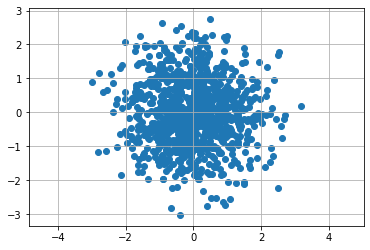

In [ ]:
plt.scatter(W[:,0], W[:,1])
plt.axis('equal')
plt.grid('on')

In [ ]:
A = rng.rand(2, 2)

In [ ]:
X = np.dot(W, A)

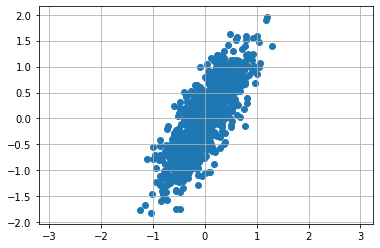

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.grid('on')

In [ ]:
np.var(X[:,0])

0.16146981846434738

In [ ]:
np.var(X[:,1])

0.4143398991106429

In [ ]:
C = np.cov(X.T)
C

array([[0.16163145, 0.20478164],
       [0.20478164, 0.41475465]])

In [ ]:
e, V = np.linalg.eig(C)

In [ ]:
e

array([0.04745802, 0.52892809])

In [ ]:
V

array([[-0.8734214 , -0.48696515],
       [ 0.48696515, -0.8734214 ]])

In [ ]:
V[:,0]

array([-0.8734214 ,  0.48696515])

In [ ]:
V[:,1]

array([-0.48696515, -0.8734214 ])

In [ ]:
u = V[:,1]

In [ ]:
u.shape

(2,)

In [ ]:
Z = np.dot(X, u)

In [ ]:
Z.shape

(1000,)

In [ ]:
np.var(Z)

0.5283991599193654

In [ ]:
np.dot(u,u)

1.0000000000000002

In [ ]:
Y = np.outer(Z,u)

In [ ]:
Y.shape

(1000, 2)

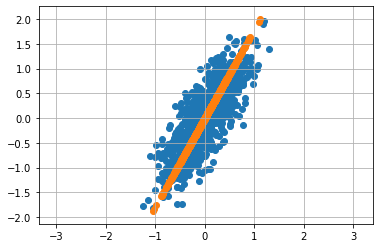

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(Y[:,0], Y[:,1])
plt.axis('equal')
plt.grid('on')

In [ ]:
# implementing PCA analysis in randomly generated values
#https://www.askpython.com/python/examples/principal-component-analysis: reference link used




import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb


rn= np.random.RandomState(0)
X=rn.randn(50,2)
# mean Centering and normalising the data   
X_meaned = (X - np.mean(X , axis = 0))/np.std(X,axis=0)
# print(X_meaned)
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar = False)
print(cov_mat)
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

projected_1 = X_reduced.dot(eigen_vectors.T[0])
projected_2 = X_reduced.dot(eigen_vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2 
res.head()
#Creating a Pandas DataFrame of reduced Dataset
df = pd.DataFrame(X_reduced , columns = ['PC1','PC2'])

z=pd.DataFrame(X)
#prepare the data
x = z.iloc[:,0:2]
 
#prepare the target
target = z.iloc[:,0]
#Concat it with target variable to create a complete Dataset
df = pd.concat([df , pd.DataFrame(target)] , axis = 1)

plt.figure(figsize = (20,8))
sb.scatterplot(data = df , x = 'PC1',y = 'PC2' , hue=target, s = 60 , palette= 'icefire')
plt.figure(figsize=(20,8))
sb.scatterplot(res['PC1'],[0]*len(res),hue=target,s=200)
sb.scatterplot(res['PC2'],[0]*len(res),hue=target,s=200)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# generating random values in 2D using random normal 
rng = np.random.RandomState(0)  #  expose a number of methods for generating
                                #   random numbers drawn from a variety of probability distributions.
W = rng.randn(100, 2)          #   we have used normal distribution
#plotting the values
plt.figure(figsize=(6,6))
plt.scatter(W[:,0], W[:,1])
plt.axis('equal')               #   used to make axix equal
plt.grid('on')                  #   used to show axix lines in plot


A = rng.rand(2, 2)            # generates random matrix of order 2x2
x = np.dot(W, A)              # multiplication with matrix to change shape into ellipse  

plt.figure(figsize=(8,8))
plt.scatter(x[:,0], x[:,1])
plt.axis('equal')
plt.grid('on')
X = (x - np.mean(x , axis = 0))/np.std(x,axis=0)  # standardization,

print(np.var(X[:,0]))    # printing column wise variance
print(np.var(X[:,1]))
C = np.cov(X.T)         # calculating and printing covarience matrix
print(C,'\n')     
e, V = np.linalg.eig(C)  # calculating and printing eigenvalues and eigenvectors
print(e ,'\n')
print(V),'\n'
if e[0]<e[1]:     # selecting eigen vector corresponding to largest eigenvalue
  i=1
else:
  i=0
u = V[:,i]           # used as feature vector
print(u.shape,'\n')
'''use the feature vector formed using the eigenvectors of the covariance matrix,
 to reorient the data from the original axes to the ones represented by the principal components
 This can be done by multiplying the transpose of the original data set by the transpose of the feature vector.'''
Z = np.dot( u.T,X.T)      # multiplication of data set with eigenvectors i. e final data set
print(Z.shape,'\n')
np.var(Z)
Y = np.outer(Z,u)        #Compute the outer product of two vectors  i.e. to plot the final result 
print(Y.shape,'\n')       # along with PC axix

plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1])
plt.scatter(Y[:,0], Y[:,1])
plt.axis('equal')
plt.grid('on')